In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
from google.colab import drive
drive.mount('/content/drive')

train_df = pd.read_csv('/content/drive/MyDrive/_kaggle/titanic/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/_kaggle/titanic/test.csv')
gen_df = pd.read_csv('/content/drive/MyDrive/_kaggle/titanic/gender_submission.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
train_df.shape

(891, 12)

In [88]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [89]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [91]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [92]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


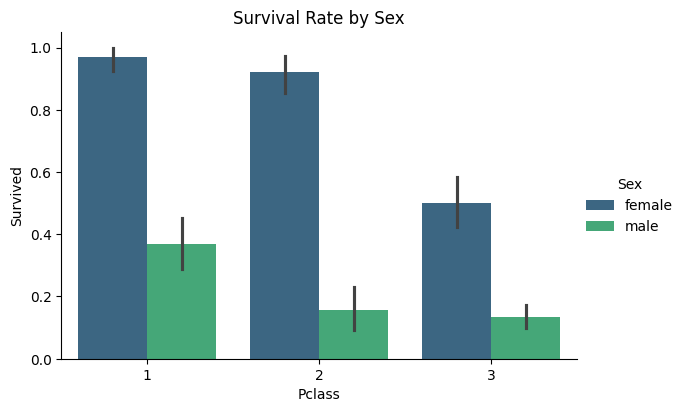

In [93]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train_df, kind='bar', palette='viridis', height=4, aspect=1.5)
plt.title('Survival Rate by Sex')
plt.show()

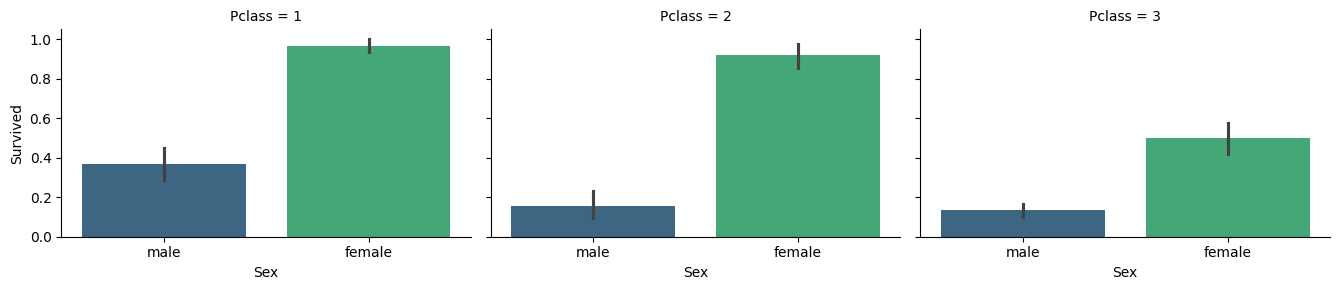

In [94]:
sns.catplot(x='Sex', y='Survived', col='Pclass', hue='Sex', data=train_df, kind='bar', palette='viridis', height=3, aspect=1.5)
# plt.title('Survival Rate by Sex')
plt.show()

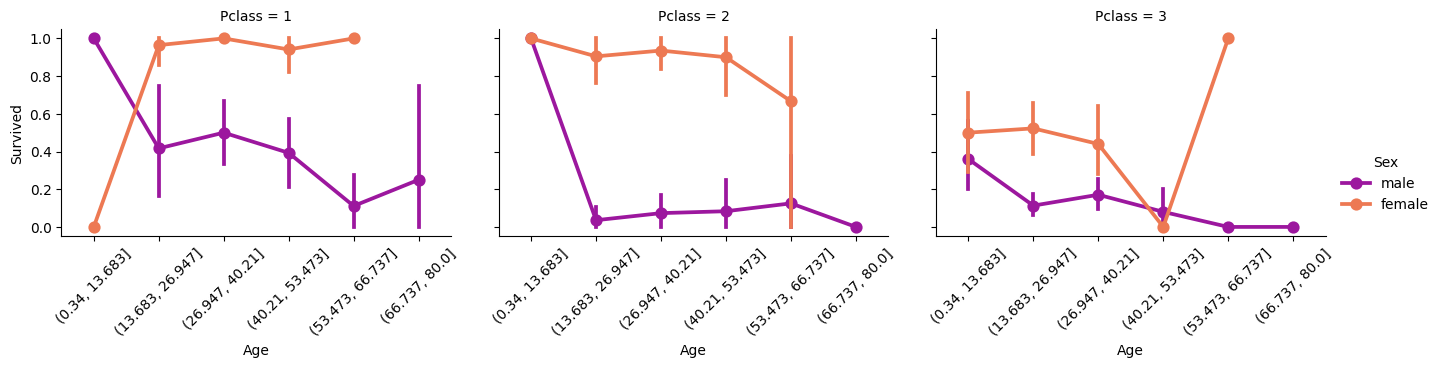

In [95]:
g = sns.catplot(x=pd.cut(train_df['Age'], bins=6), y='Survived', col='Pclass', hue='Sex', data=train_df, kind='point', palette='plasma', height=3, aspect=1.5)
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45)
plt.show()

In [96]:
train_df.loc[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# Embarked

In [97]:
cond = (
    (train_df['Pclass']==1) &
    (train_df['Fare'].between(79,81)) &
    (train_df['Cabin'].str[0] =='B')
)

mode_embarked = train_df.loc[cond, 'Embarked'].mode()[0]

train_df.loc[train_df['Embarked'].isnull(), 'Embarked'] = mode_embarked

print(mode_embarked)

C


In [98]:
train_df.loc[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [99]:
train_df.loc[[61, 829]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,C


In [100]:
train_df1 = train_df.copy()

# Name

In [101]:
X = train_df.drop(['Survived', 'PassengerId'], axis=1).copy()
y = train_df[['Survived']].copy()

test_id = test_df['PassengerId'].copy()

In [102]:
print(y.value_counts())
print(y.value_counts(normalize=True))

Survived
0           549
1           342
Name: count, dtype: int64
Survived
0           0.616162
1           0.383838
Name: proportion, dtype: float64


In [103]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y['Survived'])

print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(712, 10) (179, 10) (712, 1) (179, 1)


In [104]:
X_train['data_split'] = 1
X_valid['data_split'] = 0
test_df['data_split'] = 2

df = pd.concat([X_train, X_valid, test_df], axis=0, ignore_index=False)

In [105]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 692 to 507
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      712 non-null    int64  
 1   Name        712 non-null    object 
 2   Sex         712 non-null    object 
 3   Age         575 non-null    float64
 4   SibSp       712 non-null    int64  
 5   Parch       712 non-null    int64  
 6   Ticket      712 non-null    object 
 7   Fare        712 non-null    float64
 8   Cabin       160 non-null    object 
 9   Embarked    712 non-null    object 
 10  data_split  712 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [106]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  data_split   418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [107]:
df.info(),
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 692 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       1309 non-null   int64  
 1   Name         1309 non-null   object 
 2   Sex          1309 non-null   object 
 3   Age          1046 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Ticket       1309 non-null   object 
 7   Fare         1308 non-null   float64
 8   Cabin        295 non-null    object 
 9   Embarked     1309 non-null   object 
 10  data_split   1309 non-null   int64  
 11  PassengerId  418 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data_split,PassengerId
692,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,1,NaN
481,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S,1,NaN
527,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,1,NaN
855,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,1,NaN
801,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S,1,NaN


In [108]:
df['name_title'] = df['Name'].str.extract(r'([A-Za-z]+)\.')

In [109]:
df = df.drop(columns=['Name'])

In [110]:
df.head(10)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data_split,PassengerId,name_title
692,3,male,NaN,0,0,1601,56.4958,NaN,S,1,NaN,Mr
481,2,male,NaN,0,0,239854,0.0000,NaN,S,1,NaN,Mr
527,1,male,NaN,0,0,PC 17483,221.7792,C95,S,1,NaN,Mr
855,3,female,18.0,0,1,392091,9.3500,NaN,S,1,NaN,Mrs
801,2,female,31.0,1,1,C.A. 31921,26.2500,NaN,S,1,NaN,Mrs
652,3,male,21.0,0,0,8475,8.4333,NaN,S,1,NaN,Mr
509,3,male,26.0,0,0,1601,56.4958,NaN,S,1,NaN,Mr
557,1,male,NaN,0,0,PC 17757,227.5250,NaN,C,1,NaN,Mr
828,3,male,NaN,0,0,367228,7.7500,NaN,Q,1,NaN,Mr
18,3,female,31.0,1,0,345763,18.0000,NaN,S,1,NaN,Mrs


In [111]:
df['name_title'].unique()

array(['Mr', 'Mrs', 'Col', 'Miss', 'Rev', 'Major', 'Master', 'Dr', 'Mlle',
       'Lady', 'Sir', 'Ms', 'Jonkheer', 'Don', 'Mme', 'Capt', 'Countess',
       'Dona'], dtype=object)

In [112]:
pd.crosstab([df['name_title'], df['Age']], df['Sex'], margins=False).style.background_gradient(cmap='plasma')

In [113]:
df['Age'].max(), df['Age'].min()

(80.0, 0.17)

In [114]:
df_age_mean = df.loc[df['data_split']==1, 'Age'].mean()

mask = (df['data_split']==1) & (df['Age'].isnull())
df.loc[mask, 'Age'] = df_age_mean

In [115]:
test_mask = ((df['data_split'] == 0) | (df['data_split'] == 2)) & (df['Age'].isnull())
df.loc[test_mask, 'Age'] = df_age_mean

In [116]:
df.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,1014
Embarked,0
data_split,0


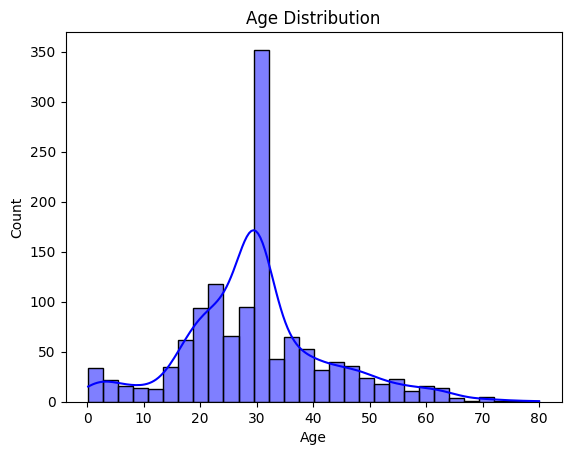

In [117]:
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [118]:
bins = [0, 12, 25, 40, 60, 85]  # 정수 또는 실수!
labels = ['0-12', '13-25', '26-40', '41-60', '61-85']

df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)  # True 하면 0까지, False 하면 0부터 가 됨
df_drop = df.drop(columns=['Age'], axis=1)

In [119]:
df_drop.head()

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data_split,PassengerId,name_title,age_group
692,3,male,0,0,1601,56.4958,NaN,S,1,NaN,Mr,26-40
481,2,male,0,0,239854,0.0000,NaN,S,1,NaN,Mr,26-40
527,1,male,0,0,PC 17483,221.7792,C95,S,1,NaN,Mr,26-40
855,3,female,0,1,392091,9.3500,NaN,S,1,NaN,Mrs,13-25
801,2,female,1,1,C.A. 31921,26.2500,NaN,S,1,NaN,Mrs,26-40


In [120]:
df2 = df_drop.copy()

# Cabin

In [121]:
df2['cabin'] = df2['Cabin'].str[0].fillna('unknown')
df_imp = pd.get_dummies(df2, columns=['cabin'], drop_first=False)

df_imp_drop = df_imp.drop(columns='Cabin')

In [122]:
df_imp_drop.head()

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,data_split,PassengerId,name_title,age_group,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_unknown
692,3,male,0,0,1601,56.4958,S,1,NaN,Mr,26-40,False,False,False,False,False,False,False,False,True
481,2,male,0,0,239854,0.0000,S,1,NaN,Mr,26-40,False,False,False,False,False,False,False,False,True
527,1,male,0,0,PC 17483,221.7792,S,1,NaN,Mr,26-40,False,False,True,False,False,False,False,False,False
855,3,female,0,1,392091,9.3500,S,1,NaN,Mrs,13-25,False,False,False,False,False,False,False,False,True
801,2,female,1,1,C.A. 31921,26.2500,S,1,NaN,Mrs,26-40,False,False,False,False,False,False,False,False,True


In [123]:
df_imp_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 692 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Pclass         1309 non-null   int64   
 1   Sex            1309 non-null   object  
 2   SibSp          1309 non-null   int64   
 3   Parch          1309 non-null   int64   
 4   Ticket         1309 non-null   object  
 5   Fare           1308 non-null   float64 
 6   Embarked       1309 non-null   object  
 7   data_split     1309 non-null   int64   
 8   PassengerId    418 non-null    float64 
 9   name_title     1309 non-null   object  
 10  age_group      1309 non-null   category
 11  cabin_A        1309 non-null   bool    
 12  cabin_B        1309 non-null   bool    
 13  cabin_C        1309 non-null   bool    
 14  cabin_D        1309 non-null   bool    
 15  cabin_E        1309 non-null   bool    
 16  cabin_F        1309 non-null   bool    
 17  cabin_G        1309 non-null   bool  

In [124]:
df_imp_drop.isnull().sum()

,0
Pclass,0
Sex,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Embarked,0
data_split,0
PassengerId,891
name_title,0


In [125]:
df3 = df_imp_drop.copy()

# Fare

In [126]:
df3.loc[df3['Fare'].isnull()]

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,data_split,PassengerId,name_title,age_group,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_unknown
152,3,male,0,0,3701,NaN,S,2,1044.0,Mr,61-85,False,False,False,False,False,False,False,False,True


In [127]:
df3_test = df3[df3['data_split']==0]

cond2 = (
    (df3_test['Pclass']==3) &
    (df3_test['SibSp']==0) &
    (df3_test['Parch']==0) &
    (df3_test['Embarked']=='S')
)

df3_test_mode = df3_test.loc[cond2, 'Fare'].mode()[0]
print(df3_test_mode)

8.05


In [128]:
df3.loc[df3['Fare'].isnull(), 'Fare'] = df3_test_mode

In [129]:
df3.isnull().sum()

,0
Pclass,0
Sex,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0
data_split,0
PassengerId,891
name_title,0


In [130]:
df3.loc[152]

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,data_split,PassengerId,name_title,age_group,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_unknown
152,3,male,0,0,A.5. 11206,8.05,S,1,NaN,Mr,41-60,False,False,False,False,False,False,False,False,True
152,3,male,0,0,3701,8.05,S,2,1044.0,Mr,61-85,False,False,False,False,False,False,False,False,True


In [131]:
df4 = df3.copy()

In [132]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 692 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Pclass         1309 non-null   int64   
 1   Sex            1309 non-null   object  
 2   SibSp          1309 non-null   int64   
 3   Parch          1309 non-null   int64   
 4   Ticket         1309 non-null   object  
 5   Fare           1309 non-null   float64 
 6   Embarked       1309 non-null   object  
 7   data_split     1309 non-null   int64   
 8   PassengerId    418 non-null    float64 
 9   name_title     1309 non-null   object  
 10  age_group      1309 non-null   category
 11  cabin_A        1309 non-null   bool    
 12  cabin_B        1309 non-null   bool    
 13  cabin_C        1309 non-null   bool    
 14  cabin_D        1309 non-null   bool    
 15  cabin_E        1309 non-null   bool    
 16  cabin_F        1309 non-null   bool    
 17  cabin_G        1309 non-null   bool  

# name_title 차원 축소

In [133]:
pd.crosstab([df4['name_title'], df4['age_group']], df4['Sex'], margins=False).style.background_gradient(cmap='plasma')     # margins=False 합계 열 삭제

In [134]:
df4['name_title'].unique()

array(['Mr', 'Mrs', 'Col', 'Miss', 'Rev', 'Major', 'Master', 'Dr', 'Mlle',
       'Lady', 'Sir', 'Ms', 'Jonkheer', 'Don', 'Mme', 'Capt', 'Countess',
       'Dona'], dtype=object)

In [135]:
# 호칭별로 정리할 매핑 딕셔너리 생성
replace_dict = {
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Miss',
    'Dr': 'Mr',      # 남성인 경우 Mr, 여성인 경우 Mrs. 데이터에 따라 아래처럼 처리 가능
    'Major': 'Mr',
    'Col': 'Mr',
    'Sir': 'Mr',
    'Don': 'Mr',
    'Jonkheer': 'Mr',
    'Rev': 'Mr',
    'Capt': 'Mr',

    'Countess': 'Mrs',
    'Lady': 'Mrs',
    'Dona': 'Mrs',
    # 'Dr'의 경우, 성별이 여성일 때는 아래처럼 따로 처리해줘야 함
}

# 일괄 치환
df4['name_title'] = df4['name_title'].replace(replace_dict)

# 'Dr'의 경우 성별에 따라 치환(예: 여성 Dr는 Mrs, 남성 Dr는 Mr)
df4.loc[(df['name_title'] == 'Dr') & (df4['Sex'] == 'female'), 'name_title'] = 'Mrs'
df4.loc[(df['name_title'] == 'Dr') & (df4['Sex'] == 'male'), 'name_title'] = 'Mr'

In [136]:
pd.crosstab([df4['name_title'], df4['age_group']], df4['Sex'], margins=False).style.background_gradient(cmap='plasma')     # margins=False 합계 열 삭제

In [137]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 692 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Pclass         1309 non-null   int64   
 1   Sex            1309 non-null   object  
 2   SibSp          1309 non-null   int64   
 3   Parch          1309 non-null   int64   
 4   Ticket         1309 non-null   object  
 5   Fare           1309 non-null   float64 
 6   Embarked       1309 non-null   object  
 7   data_split     1309 non-null   int64   
 8   PassengerId    418 non-null    float64 
 9   name_title     1309 non-null   object  
 10  age_group      1309 non-null   category
 11  cabin_A        1309 non-null   bool    
 12  cabin_B        1309 non-null   bool    
 13  cabin_C        1309 non-null   bool    
 14  cabin_D        1309 non-null   bool    
 15  cabin_E        1309 non-null   bool    
 16  cabin_F        1309 non-null   bool    
 17  cabin_G        1309 non-null   bool  

In [138]:
FamilySize = df4['SibSp'] + df4['Parch'] + 1

def family_group(size):
    if size == 1:
        return '1'
    elif 2 <= size <= 4:
        return '2-4'
    else:
        return '4+'

df4['FamilyGroup'] = FamilySize.apply(family_group)

In [139]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 692 to 417
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Pclass         1309 non-null   int64   
 1   Sex            1309 non-null   object  
 2   SibSp          1309 non-null   int64   
 3   Parch          1309 non-null   int64   
 4   Ticket         1309 non-null   object  
 5   Fare           1309 non-null   float64 
 6   Embarked       1309 non-null   object  
 7   data_split     1309 non-null   int64   
 8   PassengerId    418 non-null    float64 
 9   name_title     1309 non-null   object  
 10  age_group      1309 non-null   category
 11  cabin_A        1309 non-null   bool    
 12  cabin_B        1309 non-null   bool    
 13  cabin_C        1309 non-null   bool    
 14  cabin_D        1309 non-null   bool    
 15  cabin_E        1309 non-null   bool    
 16  cabin_F        1309 non-null   bool    
 17  cabin_G        1309 non-null   bool  

In [140]:
df5 = df4.drop(columns=['Ticket'])

In [141]:
cat_cols = df5.select_dtypes(include=['object', 'category']).columns

df5_encoded = pd.get_dummies(df5, columns=cat_cols, drop_first=False)

In [142]:
df6 = df5_encoded.copy()

In [143]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 692 to 417
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pclass             1309 non-null   int64  
 1   SibSp              1309 non-null   int64  
 2   Parch              1309 non-null   int64  
 3   Fare               1309 non-null   float64
 4   data_split         1309 non-null   int64  
 5   PassengerId        418 non-null    float64
 6   cabin_A            1309 non-null   bool   
 7   cabin_B            1309 non-null   bool   
 8   cabin_C            1309 non-null   bool   
 9   cabin_D            1309 non-null   bool   
 10  cabin_E            1309 non-null   bool   
 11  cabin_F            1309 non-null   bool   
 12  cabin_G            1309 non-null   bool   
 13  cabin_T            1309 non-null   bool   
 14  cabin_unknown      1309 non-null   bool   
 15  Sex_female         1309 non-null   bool   
 16  Sex_male           1309 non-

# data split

In [144]:
df_train = df6[df6['data_split'] == 1].copy()
df_valid = df6[df6['data_split'] == 0].copy()
df_test = df6[df6['data_split'] == 2].copy()

df_train['Survived'] = train_df1.loc[df_train.index, 'Survived']

In [145]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 692 to 507
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pclass             712 non-null    int64  
 1   SibSp              712 non-null    int64  
 2   Parch              712 non-null    int64  
 3   Fare               712 non-null    float64
 4   data_split         712 non-null    int64  
 5   PassengerId        0 non-null      float64
 6   cabin_A            712 non-null    bool   
 7   cabin_B            712 non-null    bool   
 8   cabin_C            712 non-null    bool   
 9   cabin_D            712 non-null    bool   
 10  cabin_E            712 non-null    bool   
 11  cabin_F            712 non-null    bool   
 12  cabin_G            712 non-null    bool   
 13  cabin_T            712 non-null    bool   
 14  cabin_unknown      712 non-null    bool   
 15  Sex_female         712 non-null    bool   
 16  Sex_male           712 non-nu

# Corr

In [146]:
# Cabin 관련 컬럼만 뽑기
cabin_cols = [col for col in df_train.columns if col.startswith('cabin_')]

# 상관계수 계산
corrs = df_train[cabin_cols + ['Survived']].corr()['Survived'].drop('Survived')      # .drop('Survived')는 Survived 자기자신(상관계수 1.0)을 제외
print(corrs)

# 상관계수 0.1 미만인 cabin 컬럼 찾기
low_corr_cols = corrs[abs(corrs) < 0.1].index.tolist()
print("Cabin cols to merge:", low_corr_cols)

cabin_A          0.013149
cabin_B          0.162058
cabin_C          0.152263
cabin_D          0.169875
cabin_E          0.159005
cabin_F          0.088586
cabin_G          0.018021
cabin_T         -0.029574
cabin_unknown   -0.350535
Name: Survived, dtype: float64
Cabin cols to merge: ['cabin_A', 'cabin_F', 'cabin_G', 'cabin_T']


In [147]:
df_all = pd.concat([df_train, df_valid, df_test], axis=0)

df_all['cabin_etc'] = df_all[low_corr_cols].any(axis=1).astype(int)
df_all = df_all.drop(columns=low_corr_cols)

In [148]:
df_all

,Pclass,SibSp,Parch,Fare,data_split,PassengerId,cabin_B,cabin_C,cabin_D,cabin_E,...,age_group_0-12,age_group_13-25,age_group_26-40,age_group_41-60,age_group_61-85,FamilyGroup_1,FamilyGroup_2-4,FamilyGroup_4+,Survived,cabin_etc
692,3,0,0,56.4958,1,NaN,False,False,False,False,...,False,False,True,False,False,True,False,False,1.0,0
481,2,0,0,0.0000,1,NaN,False,False,False,False,...,False,False,True,False,False,True,False,False,0.0,0
527,1,0,0,221.7792,1,NaN,False,True,False,False,...,False,False,True,False,False,True,False,False,0.0,0
855,3,0,1,9.3500,1,NaN,False,False,False,False,...,False,True,False,False,False,False,True,False,1.0,0
801,2,1,1,26.2500,1,NaN,False,False,False,False,...,False,False,True,False,False,False,True,False,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,8.0500,2,1305.0,False,False,False,False,...,False,False,True,False,False,True,False,False,NaN,0
414,1,0,0,108.9000,2,1306.0,False,True,False,False,...,False,False,True,False,False,True,False,False,NaN,0
415,3,0,0,7.2500,2,1307.0,False,False,False,False,...,False,False,True,False,False,True,False,False,NaN,0
416,3,0,0,8.0500,2,1308.0,False,False,False,False,...,False,False,True,False,False,True,False,False,NaN,0


In [149]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 692 to 417
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pclass             1309 non-null   int64  
 1   SibSp              1309 non-null   int64  
 2   Parch              1309 non-null   int64  
 3   Fare               1309 non-null   float64
 4   data_split         1309 non-null   int64  
 5   PassengerId        418 non-null    float64
 6   cabin_B            1309 non-null   bool   
 7   cabin_C            1309 non-null   bool   
 8   cabin_D            1309 non-null   bool   
 9   cabin_E            1309 non-null   bool   
 10  cabin_unknown      1309 non-null   bool   
 11  Sex_female         1309 non-null   bool   
 12  Sex_male           1309 non-null   bool   
 13  Embarked_C         1309 non-null   bool   
 14  Embarked_Q         1309 non-null   bool   
 15  Embarked_S         1309 non-null   bool   
 16  name_title_Master  1309 non-

In [150]:
df_all.head()

,Pclass,SibSp,Parch,Fare,data_split,PassengerId,cabin_B,cabin_C,cabin_D,cabin_E,...,age_group_0-12,age_group_13-25,age_group_26-40,age_group_41-60,age_group_61-85,FamilyGroup_1,FamilyGroup_2-4,FamilyGroup_4+,Survived,cabin_etc
692,3,0,0,56.4958,1,NaN,False,False,False,False,...,False,False,True,False,False,True,False,False,1.0,0
481,2,0,0,0.0000,1,NaN,False,False,False,False,...,False,False,True,False,False,True,False,False,0.0,0
527,1,0,0,221.7792,1,NaN,False,True,False,False,...,False,False,True,False,False,True,False,False,0.0,0
855,3,0,1,9.3500,1,NaN,False,False,False,False,...,False,True,False,False,False,False,True,False,1.0,0
801,2,1,1,26.2500,1,NaN,False,False,False,False,...,False,False,True,False,False,False,True,False,1.0,0


In [151]:
df_train = df_all[df_all['data_split'] == 1].copy()
df_valid = df_all[df_all['data_split'] == 0].copy()
df_test = df_all[df_all['data_split'] == 2].copy()

df_train['Survived'] = train_df1.loc[df_train.index, 'Survived']
df_valid['Survived'] = train_df1.loc[df_valid.index, 'Survived']

High corr pairs:
         level_0        level_1      corr
207  Sex_female       Sex_male  1.000000
213  Sex_female  name_title_Mr  0.911416
230    Sex_male  name_title_Mr  0.911416


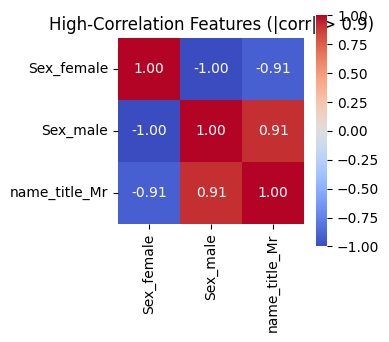

In [152]:
# 1) 상관계수 절댓값 행렬
corr = df_train.corr().abs()

# 2) 상삼각(중복) 제외용 마스크
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# 3) (i, j) 쌍으로 풀어낸 뒤, threshold 초과만 필터링
threshold = 0.90
high_corr_pairs = (
    corr.where(mask)                 # 상삼각만 남김
        .stack()                     # Series: (var1, var2) → corr 값
        .reset_index()               # DataFrame으로
        .rename(columns={0: "corr"}) # 컬럼 이름 변경
        .query("corr > @threshold")  # corr > 0.8 필터
)

print("High corr pairs:\n", high_corr_pairs)

# 1) 고상관 변수 목록
high_vars = pd.unique(high_corr_pairs[['level_0','level_1']].values.ravel())

# 2) 그 변수들만 추린 상관 행렬
sub_corr = df_train[high_vars].corr()

# 3) 히트맵
plt.figure(figsize=(len(high_vars), len(high_vars)))
sns.heatmap(sub_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("High-Correlation Features (|corr| > 0.9)")
plt.show()

In [153]:
to_drop = high_corr_pairs['level_1'].unique()
print(f"\nTo drop:\n{to_drop}")

df_train_reduced = df_train.drop(columns=to_drop)
print(f"\nFinal columns: {df_train_reduced.shape[1]}")

df_valid_reduced = df_valid.drop(columns=to_drop)
df_test_reduced = df_test.drop(columns=to_drop)


To drop:
['Sex_male' 'name_title_Mr']

Final columns: 28


In [154]:
df_train_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 692 to 507
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pclass             712 non-null    int64  
 1   SibSp              712 non-null    int64  
 2   Parch              712 non-null    int64  
 3   Fare               712 non-null    float64
 4   data_split         712 non-null    int64  
 5   PassengerId        0 non-null      float64
 6   cabin_B            712 non-null    bool   
 7   cabin_C            712 non-null    bool   
 8   cabin_D            712 non-null    bool   
 9   cabin_E            712 non-null    bool   
 10  cabin_unknown      712 non-null    bool   
 11  Sex_female         712 non-null    bool   
 12  Embarked_C         712 non-null    bool   
 13  Embarked_Q         712 non-null    bool   
 14  Embarked_S         712 non-null    bool   
 15  name_title_Master  712 non-null    bool   
 16  name_title_Miss    712 non-nu

In [155]:
y_train = df_train_reduced['Survived']
df_train_reduced = df_train_reduced.drop(columns=['Survived', 'data_split', 'PassengerId'])

y_valid = df_valid_reduced['Survived']
df_valid_reduced = df_valid_reduced.drop(columns=['Survived', 'data_split', 'PassengerId'])

df_test_reduced = df_test_reduced.drop(columns=['Survived', 'data_split', 'PassengerId'])

# Select importances

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# 1️⃣ RandomForestClassifier 모델 생성
model2 = RandomForestClassifier(random_state=42)

# 2️⃣ SelectFromModel로 feature selection (자동 threshold 기준)
selector = SelectFromModel(model2)
selector.fit(df_train_reduced, y_train)  # 내부적으로 RandomForestClassifier fit됨

# 3️⃣ 선택된 변수 이름들
selected_features = df_train_reduced.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())

Selected features: ['Pclass', 'Fare', 'cabin_unknown', 'Sex_female', 'name_title_Miss', 'name_title_Mrs']


/tmp/ipython-input-157-4250107110.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance (%)', y='Feature', data=importance_df, palette='viridis')


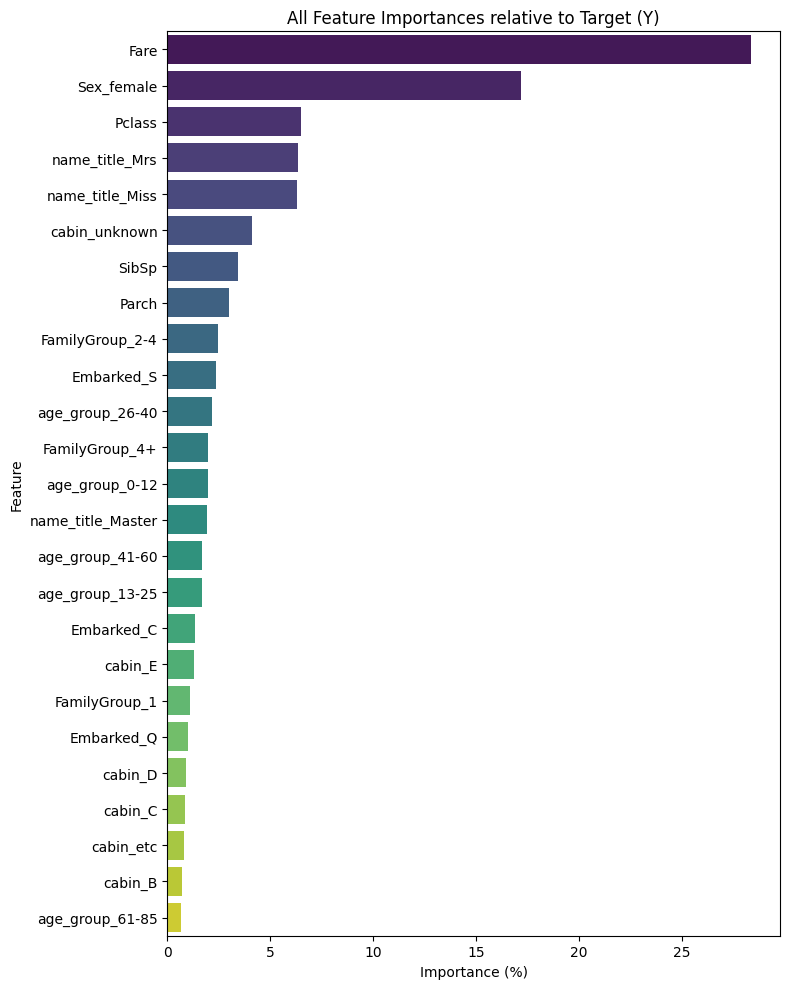

In [157]:
# 4️⃣ 모든 변수의 feature importance 가져오기 (RandomForest에서 직접)
importances = selector.estimator_.feature_importances_

# 5️⃣ DataFrame으로 정리 (모든 변수 포함)
importance_df = pd.DataFrame({
    'Feature': df_train_reduced.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 6️⃣ (선택) %로 변환
importance_df['Importance (%)'] = importance_df['Importance'] * 100

# 7️⃣ 시각화
plt.figure(figsize=(8, len(importance_df) * 0.4))
sns.barplot(x='Importance (%)', y='Feature', data=importance_df, palette='viridis')
plt.title("All Feature Importances relative to Target (Y)", fontsize=12)
plt.xlabel("Importance (%)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [158]:
# 1️⃣ 중요도 threshold 설정 (예: 0.01 → 1% 미만 변수 제거)
threshold = 0.02

# 2️⃣ 중요도 기준으로 변수 선택
selected_importance_df = importance_df[importance_df['Importance'] >= threshold]

# 선택된 변수명만 추출
selected_features = selected_importance_df['Feature']

print(f"Selected features ({len(selected_features)}):")
print(selected_features.tolist())

# 3️⃣ X 데이터에서 중요 변수만 선택
X_train_fin = df_train_reduced[selected_features]
X_valid_fin = df_valid_reduced[selected_features]
test  = df_test_reduced[selected_features]

Selected features (11):
['Fare', 'Sex_female', 'Pclass', 'name_title_Mrs', 'name_title_Miss', 'cabin_unknown', 'SibSp', 'Parch', 'FamilyGroup_2-4', 'Embarked_S', 'age_group_26-40']


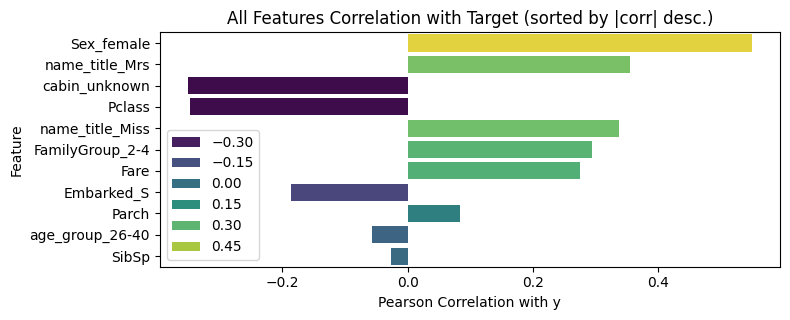

In [159]:
corr_with_y = X_train_fin.corrwith(y_train)

# 2️⃣ 절댓값 기준 내림차순으로 정렬 (실제 값 순으로 보고 싶으면 sort_values(ascending=False) 사용)
corr_sorted = corr_with_y.reindex(corr_with_y.abs().sort_values(ascending=False).index)

# 3️⃣ 시각화
plt.figure(figsize=(8, len(corr_sorted) * 0.3))
sns.barplot(x=corr_sorted.values, y=corr_sorted.index, hue=corr_sorted.values, palette='viridis')
plt.title('All Features Correlation with Target (sorted by |corr| desc.)')
plt.xlabel('Pearson Correlation with y')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

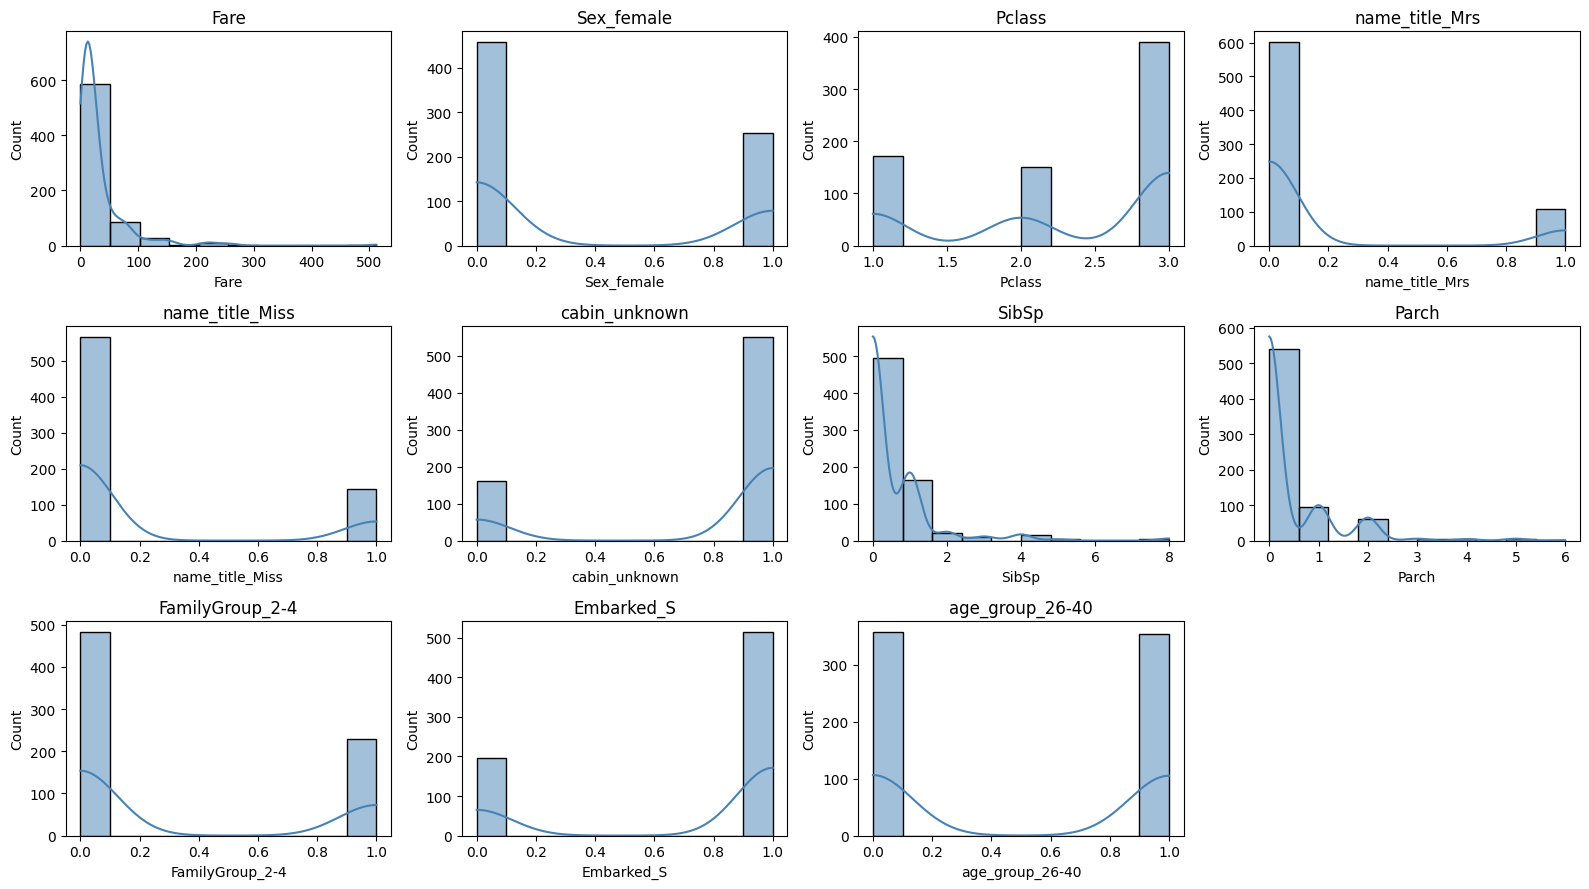

In [160]:
cols = X_train_fin.columns
ncols = 4
nrows = (len(cols) + ncols - 1) // ncols

plt.figure(figsize=(ncols*4, nrows*3))
for i, col in enumerate(cols):
    plt.subplot(nrows, ncols, i+1)
    sns.histplot(X_train_fin[col], bins=10, kde=True, color='steelblue')
    plt.title(col)
plt.tight_layout()
plt.show()

# Training

LightGBM

In [161]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

lgbm = LGBMClassifier(
    objective='binary',
    class_weight='balanced',
    n_estimators=2000,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

lgbm.fit(
    X_train_fin, y_train,
    eval_set=[(X_valid_fin, y_valid)],    # eval_set은 검증 데이터로 '모델 성능을 평가'만 하고, 학습은 train 데이터로만 진행
    eval_metric='auc',   # 불균형 데이터면 'auc', 아니면 'accuracy' 등
    callbacks=[
        lgb.early_stopping(stopping_rounds=30),
        lgb.log_evaluation(period=0)
    ]
)

y_valid_pred = lgbm.predict(X_valid_fin)
y_valid_proba = lgbm.predict_proba(X_valid_fin)[:, 1]

print("Validation Accuracy:", accuracy_score(y_valid, y_valid_pred))
print("Validation AUC:", roc_auc_score(y_valid, y_valid_proba))

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.821871	valid_0's binary_logloss: 0.513601
Validation Accuracy: 0.7653631284916201
Validation AUC: 0.821870882740448


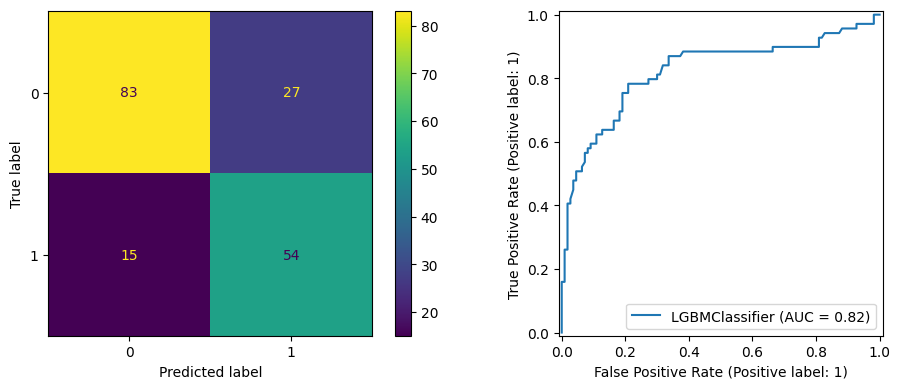

In [162]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1행 2열 서브플롯

cm = confusion_matrix(y_valid, y_valid_pred)
ConfusionMatrixDisplay(cm).plot(ax=ax1)
RocCurveDisplay.from_estimator(lgbm, X_valid_fin, y_valid, ax=ax2)
plt.tight_layout()
plt.show()

In [163]:
from sklearn.model_selection import GridSearchCV

# 파라미터 범위 간단하게!
param_grid = {
    'learning_rate': [0.01, 0.1],
    'num_leaves': [15, 31],
    'max_depth': [3, -1]
}

lgbm = LGBMClassifier(
    objective='binary',
    class_weight='balanced',
    n_estimators=1000,
    random_state=42,
)

lgbm_search = GridSearchCV(
    lgbm,
    param_grid,
    scoring='roc_auc',
    cv=4,
    n_jobs=-1,
    verbose=1
)

lgbm_search.fit(X_train_fin, y_train)

print("Best Parameters:", lgbm_search.best_params_)

best_model_lgbm = lgbm_search.best_estimator_

# 최적 모델 예측/평가
y_pred = lgbm_search.predict(X_valid_fin)
y_proba = lgbm_search.predict_proba(X_valid_fin)[:, 1]

print("Accuracy:", accuracy_score(y_valid, y_pred))
print("AUC:", roc_auc_score(y_valid, y_proba))

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'num_leaves': 15}
Accuracy: 0.770949720670391
AUC: 0.8270750988142292


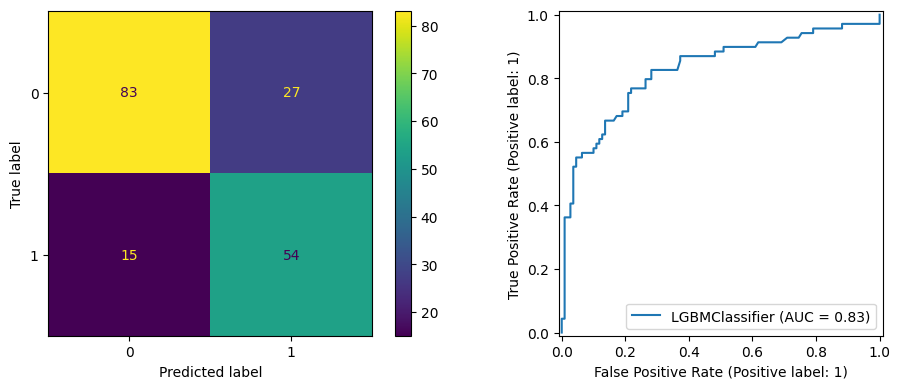

In [164]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1행 2열 서브플롯

cm = confusion_matrix(y_valid, y_valid_pred)
ConfusionMatrixDisplay(cm).plot(ax=ax1)
RocCurveDisplay.from_estimator(best_model_lgbm, X_valid_fin, y_valid, ax=ax2)
plt.tight_layout()
plt.show()

GradientBoosting

In [165]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

gb = GradientBoostingClassifier(
    validation_fraction=0.1,
    n_iter_no_change=10,
    tol=1e-4,     # loss(손실), error, 점수 등의 변화가 0.0001보다 작으면 stop
    random_state=42
)

gb_search = RandomizedSearchCV(
    gb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

gb_search.fit(X_train_fin, y_train)

print("Best Parameters:", gb_search.best_params_)

best_model_gb = gb_search.best_estimator_

y_valid_pred = best_model_gb.predict(X_valid_fin)
y_valid_proba = best_model_gb.predict_proba(X_valid_fin)[:, 1]

print("Validation Accuracy:", accuracy_score(y_valid, y_valid_pred))
print("Validation AUC:", roc_auc_score(y_valid, y_valid_proba))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 2, 'learning_rate': 0.1}
Validation Accuracy: 0.7932960893854749
Validation AUC: 0.8279314888010542


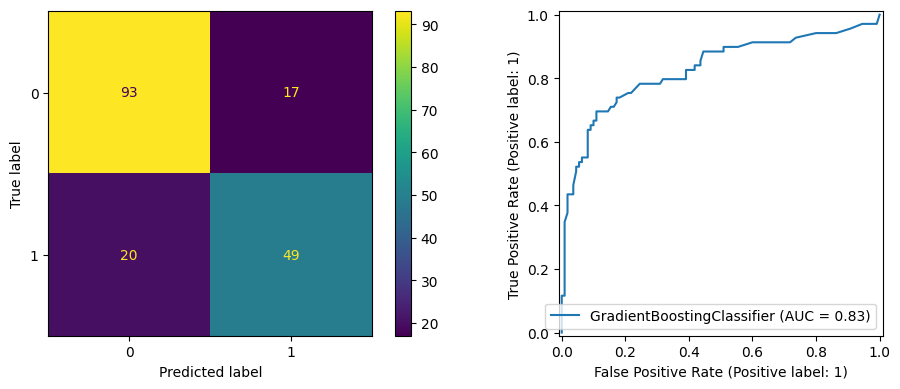

In [166]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1행 2열 서브플롯

cm = confusion_matrix(y_valid, y_valid_pred)
ConfusionMatrixDisplay(cm).plot(ax=ax1)
RocCurveDisplay.from_estimator(best_model_gb, X_valid_fin, y_valid, ax=ax2)
plt.tight_layout()
plt.show()

Adaboost

In [177]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.utils.class_weight import compute_sample_weight

# 파라미터 탐색 범위 (적당히 좁게)
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.5, 1.0, 1.5, 2.0]
}

# AdaBoost 모델 정의
ada = AdaBoostClassifier(random_state=42)

# RandomizedSearchCV
ada_search = RandomizedSearchCV(
    ada,
    param_distributions=param_dist,
    n_iter=10,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# 클래스 불균형 대응 (sample_weight)
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# 하이퍼파라미터 튜닝 + 학습
ada_search.fit(X_train_fin, y_train, sample_weight=sample_weights)

print("Best Parameters:", ada_search.best_params_)

# 최적 모델로 예측
best_model_ada = ada_search.best_estimator_

y_valid_pred = best_model_ada.predict(X_valid_fin)
y_valid_proba = best_model_ada.predict_proba(X_valid_fin)[:, 1]

print("Validation Accuracy:", accuracy_score(y_valid, y_valid_pred))
print("Validation AUC:", roc_auc_score(y_valid, y_valid_proba))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 300, 'learning_rate': 1.5}
Validation Accuracy: 0.7541899441340782
Validation AUC: 0.8137022397891962


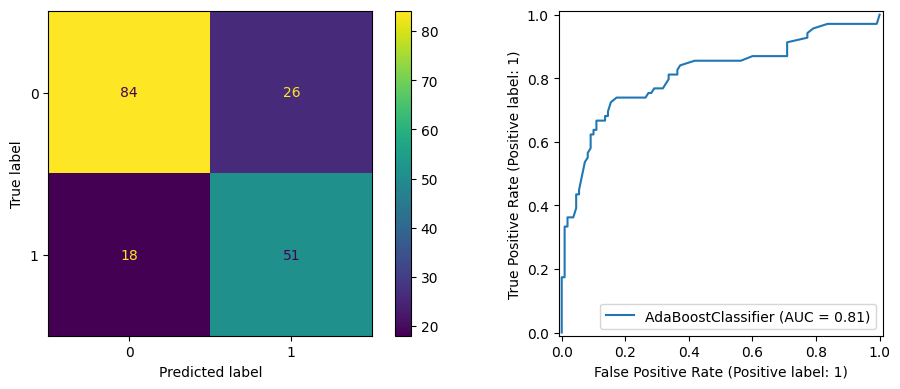

In [178]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1행 2열 서브플롯

cm = confusion_matrix(y_valid, y_valid_pred)
ConfusionMatrixDisplay(cm).plot(ax=ax1)
RocCurveDisplay.from_estimator(best_model_ada, X_valid_fin, y_valid, ax=ax2)
plt.tight_layout()
plt.show()

# XGboost

In [176]:
from xgboost import XGBClassifier

# y_train에서 클래스 비율을 계산해서 scale_pos_weight 지정
neg = np.sum(y_train == 0)
pos = np.sum(y_train == 1)
scale_pos_weight = neg / pos

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,  # 불균형 처리
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,  # 불필요한 warning 제거
    eval_metric='logloss',   # AUC, error 등도 가능
    verbosity=0
)

xgb_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

xgb_search.fit(X_train_fin, y_train)

print("Best Parameters:", xgb_search.best_params_)

best_model_xgb = xgb_search.best_estimator_

y_valid_pred = best_model_xgb.predict(X_valid_fin)
y_valid_proba = best_model_xgb.predict_proba(X_valid_fin)[:, 1]

print("Validation Accuracy:", accuracy_score(y_valid, y_valid_pred))
print("Validation AUC:", roc_auc_score(y_valid, y_valid_proba))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 2, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Validation Accuracy: 0.7597765363128491
Validation AUC: 0.8208168642951251


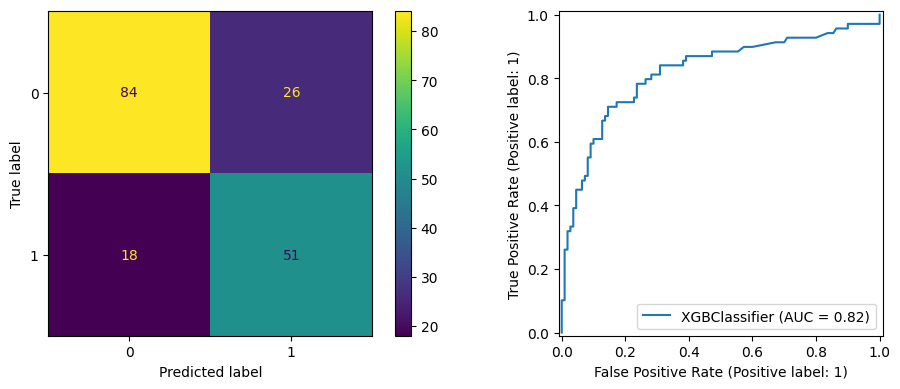

In [179]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1행 2열 서브플롯

cm = confusion_matrix(y_valid, y_valid_pred)
ConfusionMatrixDisplay(cm).plot(ax=ax1)
RocCurveDisplay.from_estimator(best_model_xgb, X_valid_fin, y_valid, ax=ax2)
plt.tight_layout()
plt.show()

SVM

In [170]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_fin_scaled = scaler.fit_transform(X_train_fin)
X_valid_fin_scaled = scaler.transform(X_valid_fin)
test_scaled = scaler.transform(test)

# 1. SVM 파라미터 후보군 지정
param_grid = {
    'C': [0.1, 1, 10],          # 규제 강도(클수록 규제 약함)
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 0.01, 0.1, 1]  # rbf, poly, sigmoid 커널에서 사용
}

# 2. 모델 생성
svm = SVC(probability=True, random_state=42)

# 3. GridSearchCV로 하이퍼파라미터 튜닝
svm_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=2
)

# 4. 모델 학습
svm_search.fit(X_train_fin_scaled, y_train)

# 5. 최적 모델로 예측
best_svm = svm_search.best_estimator_

y_valid_pred = best_svm.predict(X_valid_fin_scaled)
y_valid_proba = best_svm.predict_proba(X_valid_fin_scaled)[:, 1]

# 6. 성능 평가
print("Validation Accuracy:", accuracy_score(y_valid, y_valid_pred))
print("Validation AUC:", roc_auc_score(y_valid, y_valid_proba))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Validation Accuracy: 0.7988826815642458
Validation AUC: 0.8276021080368906


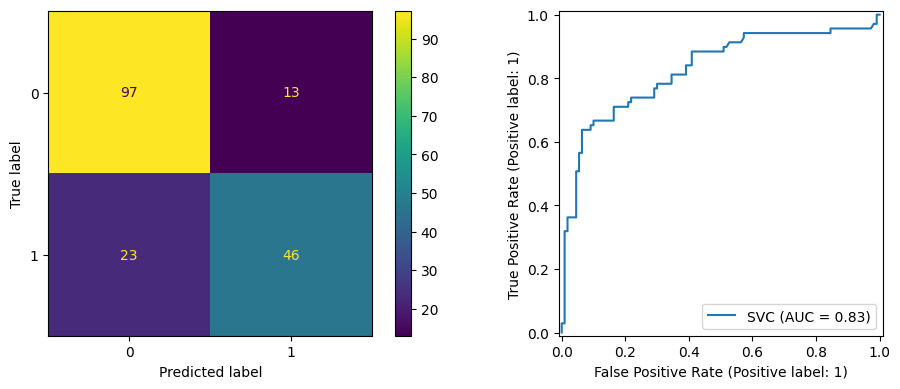

In [171]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1행 2열 서브플롯

cm = confusion_matrix(y_valid, y_valid_pred)
ConfusionMatrixDisplay(cm).plot(ax=ax1)
RocCurveDisplay.from_estimator(best_svm, X_valid_fin_scaled, y_valid, ax=ax2)
plt.tight_layout()
plt.show()

KNN

In [172]:
from sklearn.neighbors import KNeighborsClassifier

# 2. KNN 파라미터 후보 지정
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]   # p=1: 맨해튼, p=2: 유클리드 거리
}

# 3. 모델 생성
knn = KNeighborsClassifier()

# 4. GridSearchCV로 튜닝
knn_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=2
)

# 5. 학습
knn_search.fit(X_train_fin_scaled, y_train)

# 6. 최적 모델로 예측
best_knn = knn_search.best_estimator_

y_valid_pred = best_knn.predict(X_valid_fin_scaled)
y_valid_proba = best_knn.predict_proba(X_valid_fin_scaled)[:, 1]

# 7. 평가
print("Validation Accuracy:", accuracy_score(y_valid, y_valid_pred))
print("Validation AUC:", roc_auc_score(y_valid, y_valid_proba))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Validation Accuracy: 0.7430167597765364
Validation AUC: 0.8119235836627141


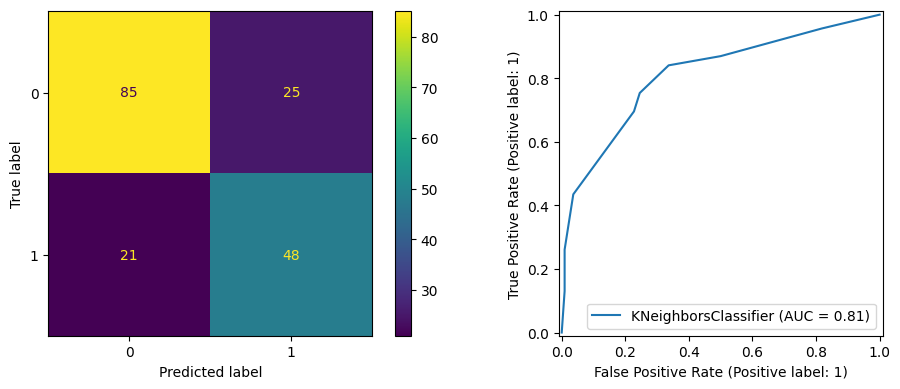

In [173]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1행 2열 서브플롯

cm = confusion_matrix(y_valid, y_valid_pred)
ConfusionMatrixDisplay(cm).plot(ax=ax1)
RocCurveDisplay.from_estimator(best_knn, X_valid_fin_scaled, y_valid, ax=ax2)
plt.tight_layout()
plt.show()

In [183]:
# 6. 테스트 데이터 예측
y_test_proba = best_model_gb.predict_proba(test)[:, 1]
y_test_pred  = (y_test_proba >= 0.5).astype(int)   # 필요에 따라 threshold 변경

print("Test predictions (probability, first 5):", y_test_proba[:5])
print("Test predictions (class, first 5):", y_test_pred[:5])

# 7. 제출 파일 생성 (PassengerId는 test_id 등으로 미리 저장해둔다고 가정)
submission = pd.DataFrame({
    'PassengerId': test_id,   # DataFrame['컬럼명'] → Series
    'Survived': y_test_pred
})
submission.to_csv('submission.csv', index=False)

Test predictions (probability, first 5): [0.1629022  0.61420918 0.15632223 0.10727704 0.54357815]
Test predictions (class, first 5): [0 1 0 0 1]
